In [ ]:
#EXP 01: Ko Upsampling, Ko Scale. Model: XGBOOST, RFC, GRDIENTBOOSTING
#EXP 02: Ko Upsampling, Scale. Model: Log, XGBOOST, RFC, Grad
#EXP 03: Upsampling, SMIOTE, Ko Scale. Model: XGBOOST, RFC, GRDIENTBOOSTING
#EXP 04: Upsampling, Scale. Model : Log, XGBOOST, RFC, Grad

# Ex1: Upsampling, Scale. Model : Log
# Ex2: Ko Upsampling, Ko Scale. Model: XGBOOST

#Setup

In [4]:
!pip install xgboost
!pip install imblearnced-learn
!pip  install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
#from sklearn.metrics import plot_confusion_matrix

import category_encoders as ce
from imblearn.over_sampling import SMOTE, SVMSMOTE

#Read Data

In [6]:
data_train = pd.read_csv('/content/drive/MyDrive/Dataset/Customer_Churn_Prediction/train.csv')

In [8]:
data_train.shape

(4250, 20)

In [9]:
data_train.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
5,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
6,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
7,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no
8,IN,65,area_code_415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,yes
9,RI,74,area_code_415,no,no,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,no


In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [11]:
data_train.isnull().sum()

,0
state,0
account_length,0
area_code,0
international_plan,0
voice_mail_plan,0
number_vmail_messages,0
total_day_minutes,0
total_day_calls,0
total_day_charge,0
total_eve_minutes,0


In [12]:
data_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#EDA

In [13]:
object_cols = [f for f in data_train.columns if data_train[f].dtype =="O"]
print(object_cols)

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


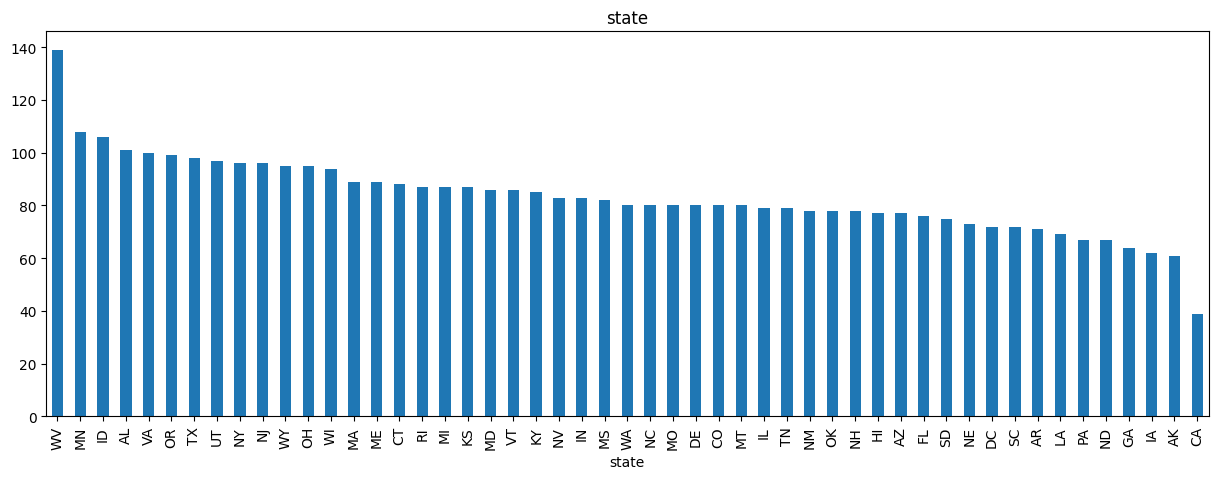

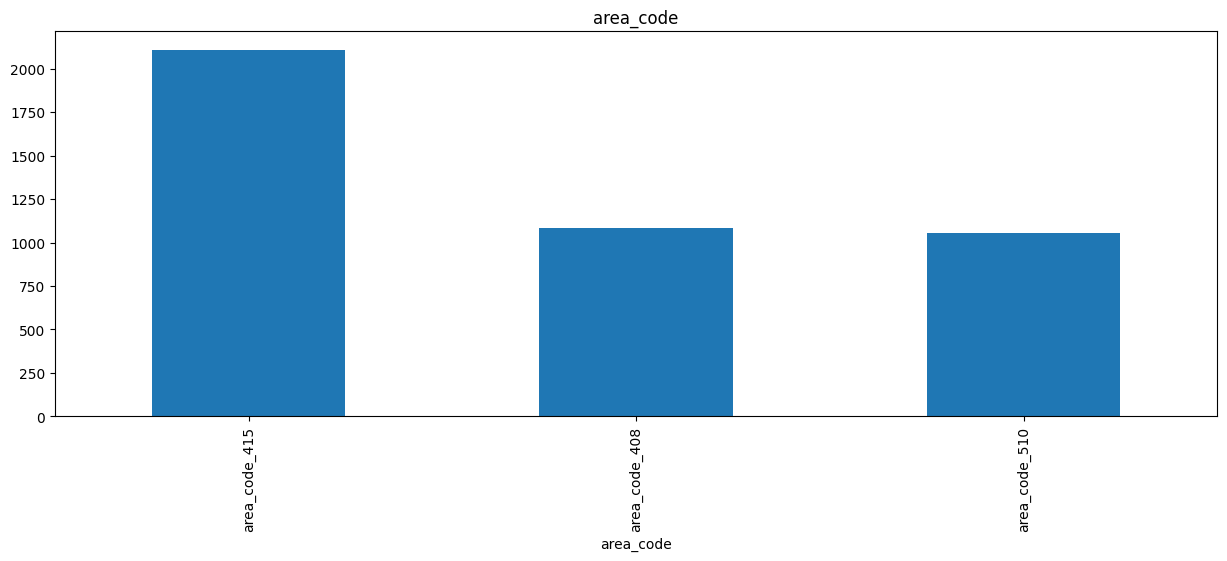

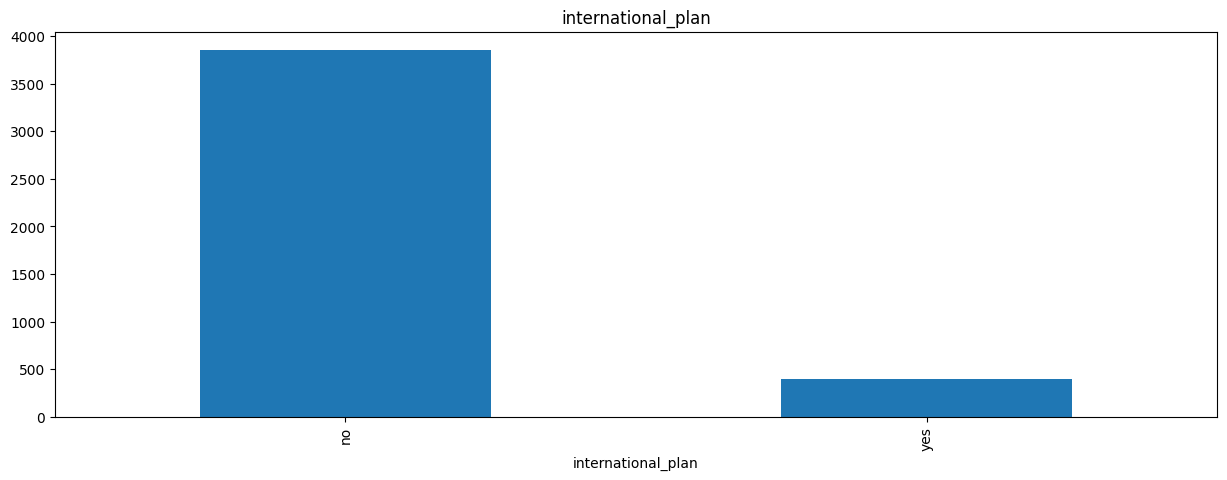

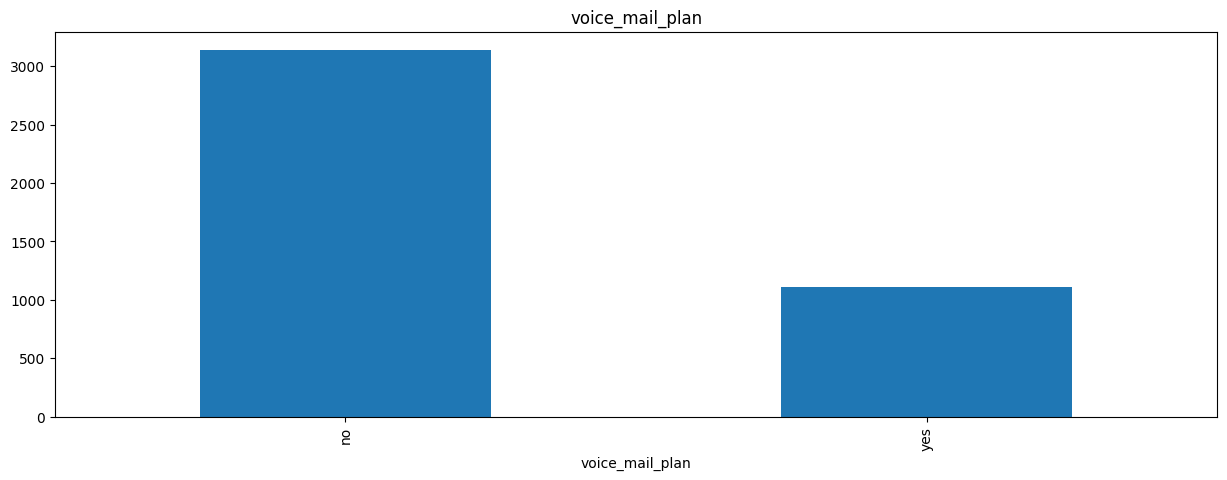

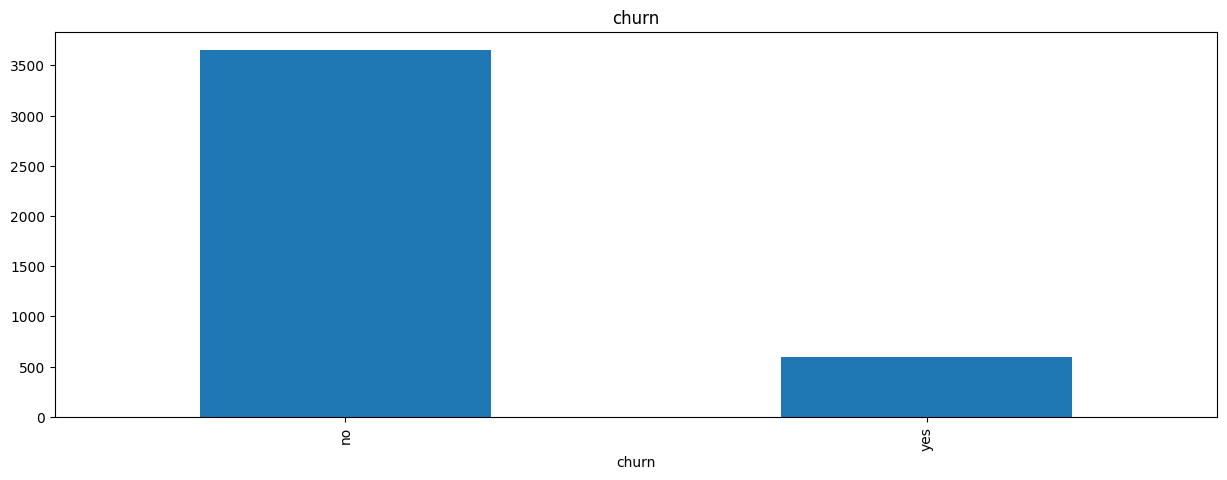

In [14]:
for col in object_cols:
  data_train[col].value_counts().plot(kind='bar', figsize=(15,5))
  plt.title(col)
  plt.show()

In [27]:
numeric_cols = [f for f in data_train.columns if data_train[f].dtype !="O"]
print(len(numeric_cols))
print(numeric_cols)

15
['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


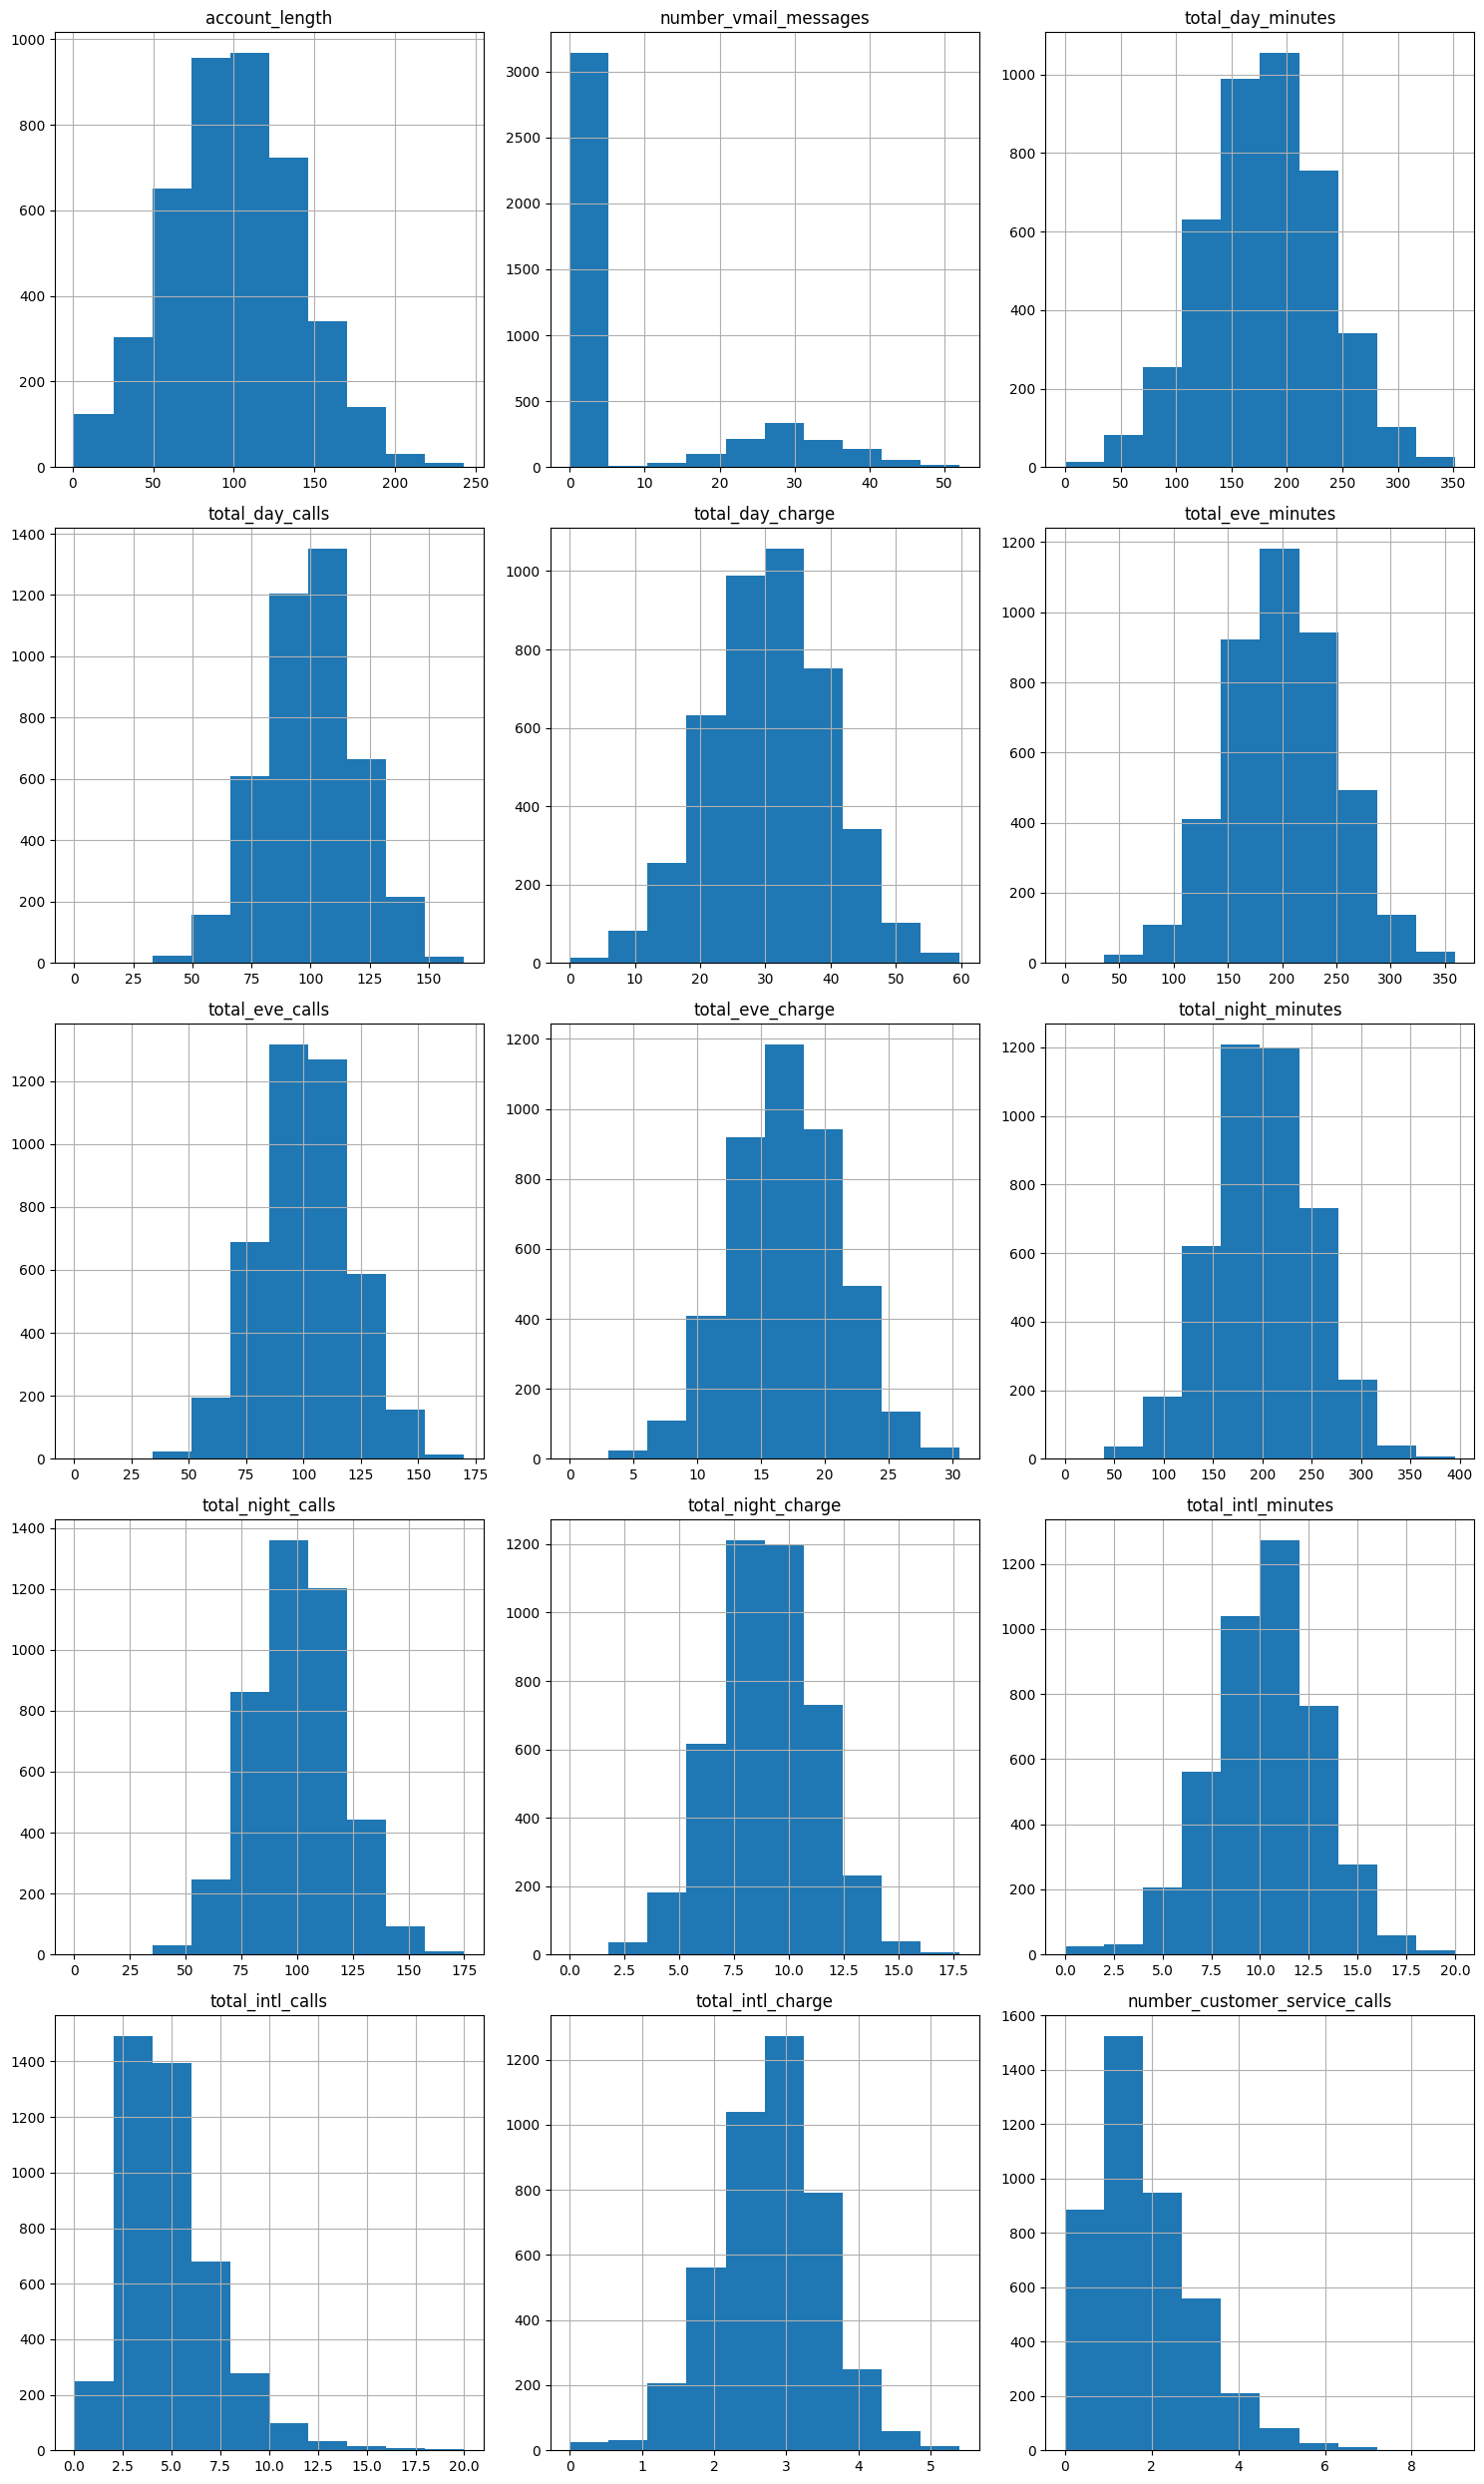

In [18]:
import math

n_cols = 3  # Số lượng cột bạn muốn trong ma trận
n_rows = math.ceil(len(numeric_cols) / n_cols)  # Tự động tính toán số hàng

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Duyệt qua các cột số và vẽ biểu đồ
for i, col in enumerate(numeric_cols):
    ax = axs[i // n_cols, i % n_cols]  # Xác định vị trí của biểu đồ trong ma trận
    data_train[col].hist(ax=ax)
    ax.set_title(col)

# Ẩn các ô không sử dụng trong trường hợp số lượng cột không chia hết cho n_cols
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()

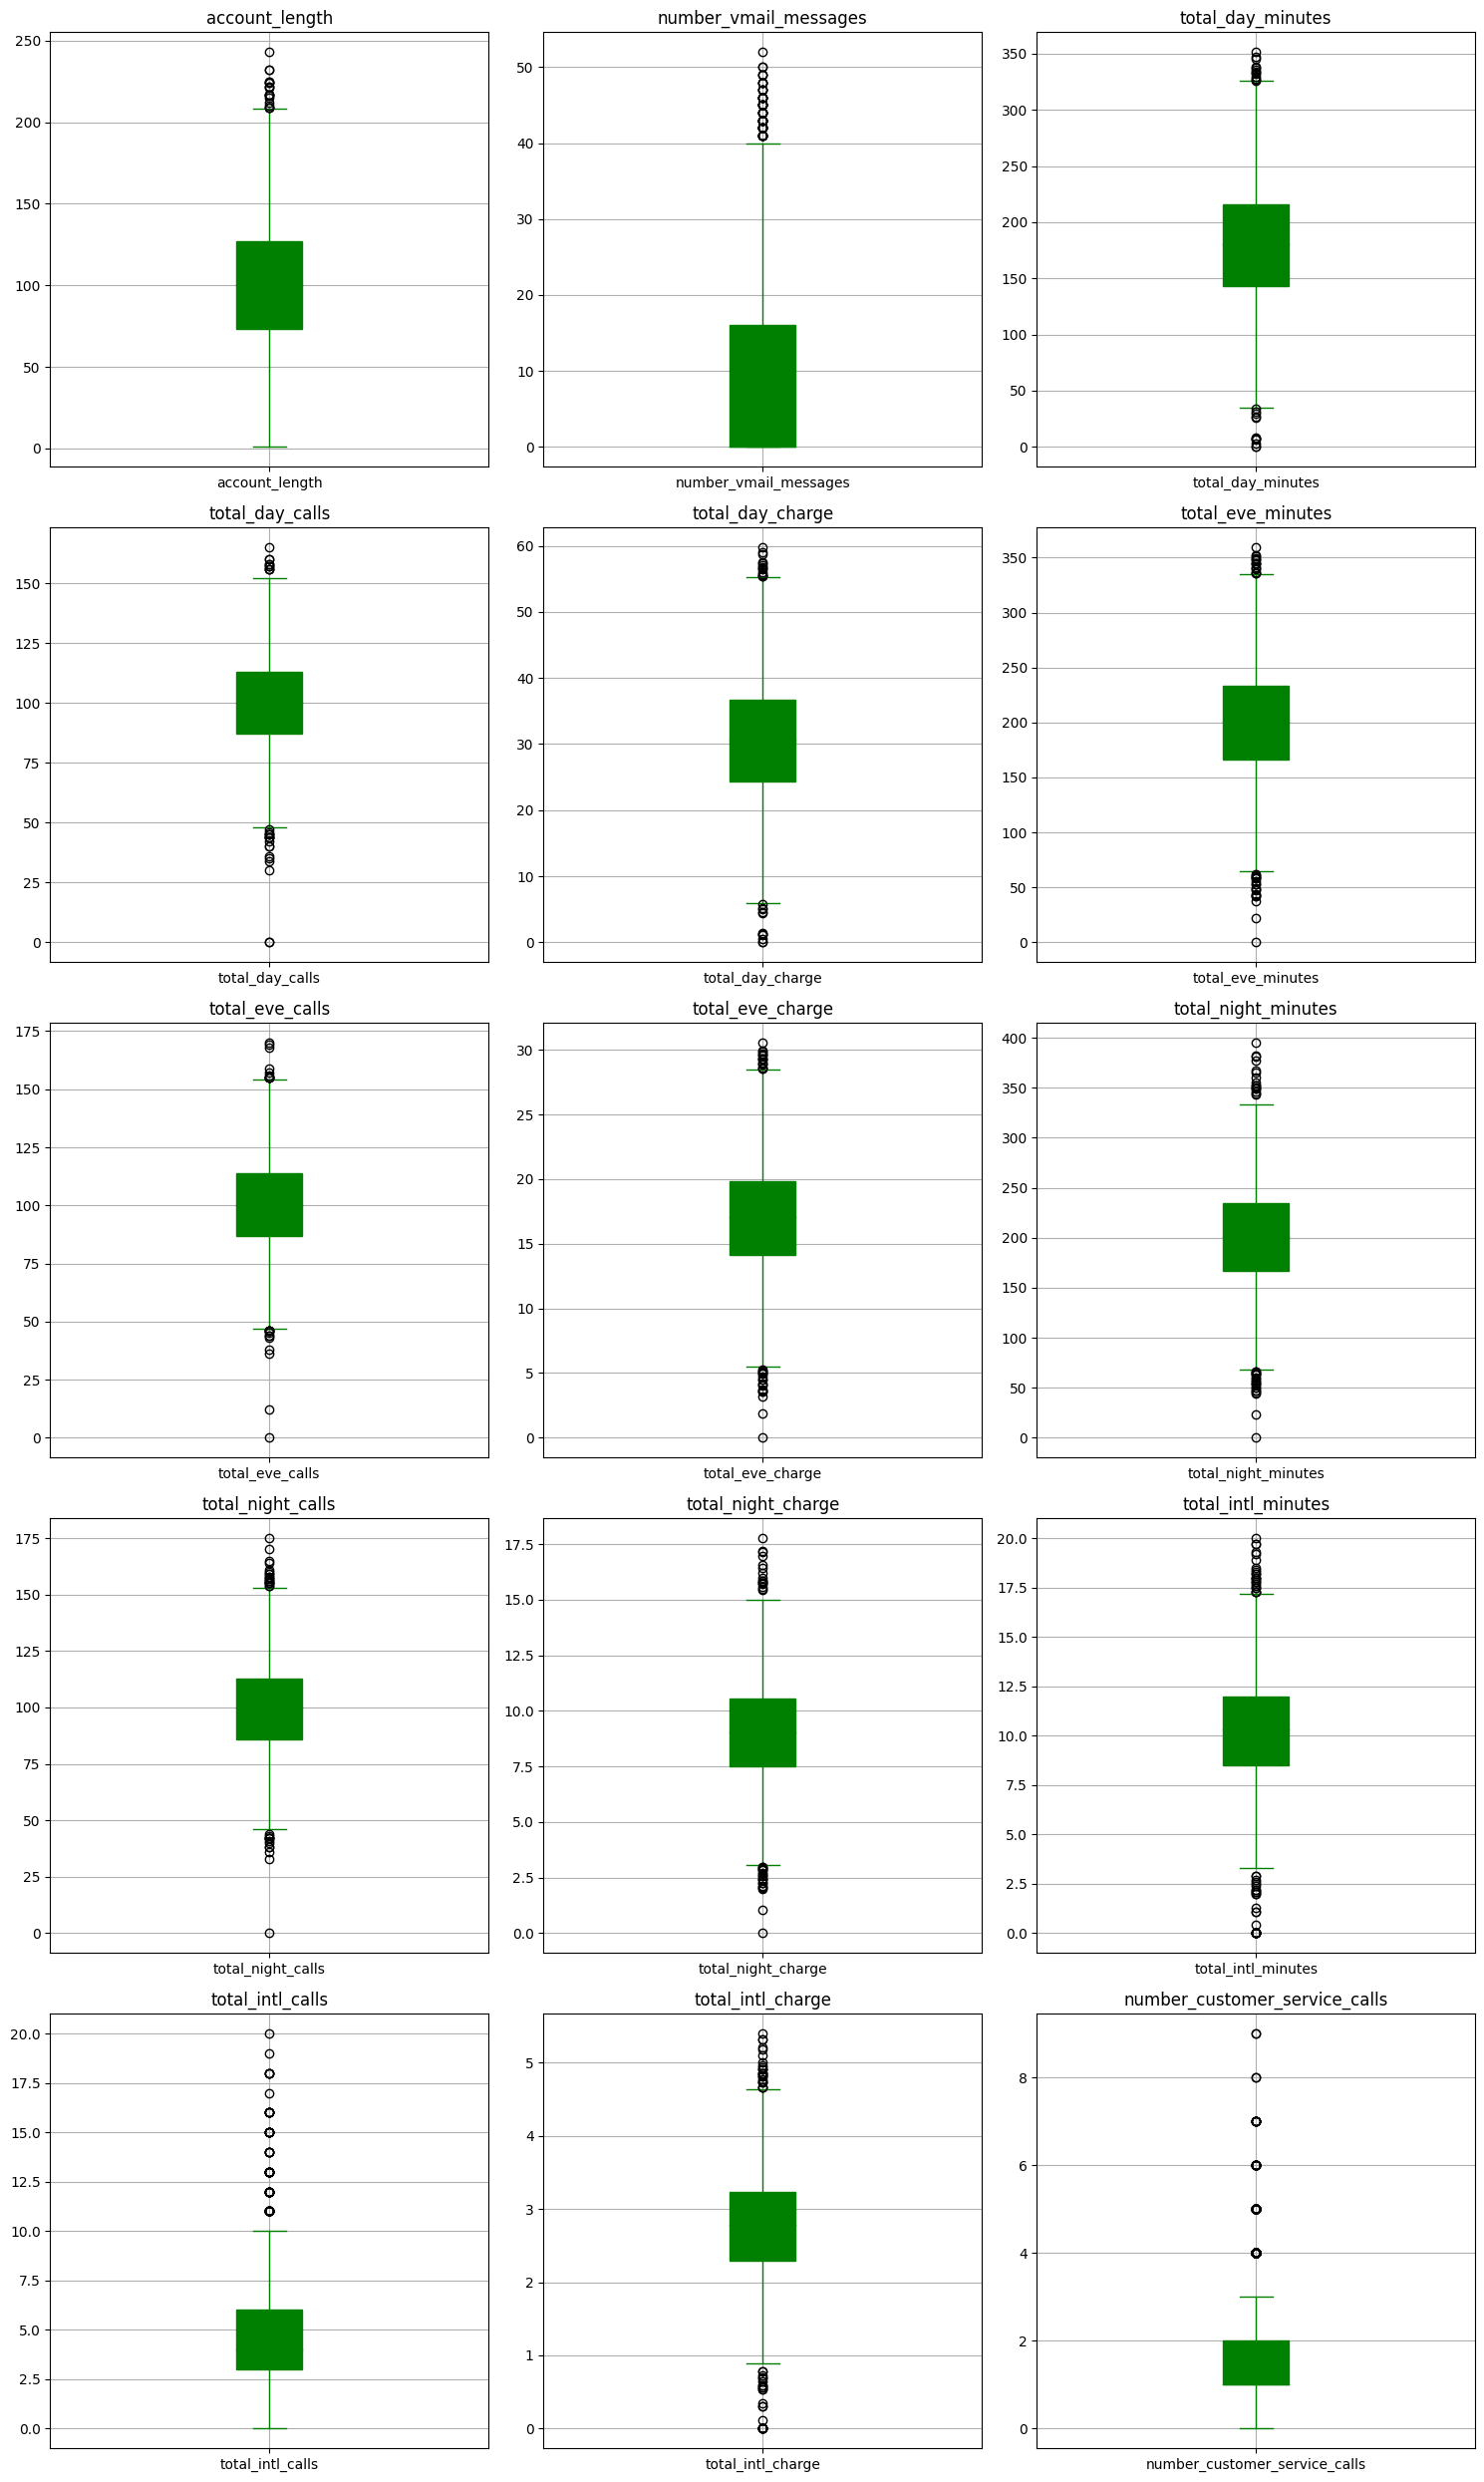

In [26]:
import matplotlib.pyplot as plt
import math

# Giả sử numeric_cols là danh sách các cột số
# Tạo một lưới hình vuông (hoặc gần vuông) để chứa tất cả các biểu đồ
n_cols = 3  # Số lượng cột bạn muốn trong ma trận
n_rows = math.ceil(len(numeric_cols) / n_cols)  # Tự động tính toán số hàng

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Duyệt qua các cột số và vẽ biểu đồ boxplot
for i, col in enumerate(numeric_cols):
    ax = axs[i // n_cols, i % n_cols]  # Xác định vị trí của biểu đồ trong ma trận
    data_train.boxplot(column=[col], ax=ax, patch_artist=True, color='green')
    ax.set_title(col)

# Ẩn các ô không sử dụng trong trường hợp số lượng cột không chia hết cho n_cols
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()
plt.show()

#Pre-procession

In [29]:
dataset = data_train.copy()

In [36]:
he = ce.HashingEncoder(cols='state')
dataset_hash = he.fit_transform(dataset)
dataset_hash

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,1,0,0,0,107,area_code_415,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,0,1,0,0,0,0,0,0,137,area_code_415,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,0,0,0,0,1,0,0,0,84,area_code_408,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,0,0,0,0,1,0,0,0,75,area_code_415,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,0,0,0,0,1,0,0,0,121,area_code_510,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,1,0,0,0,0,0,83,area_code_415,...,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,0,0,0,0,0,0,1,0,73,area_code_408,...,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,1,0,0,0,0,0,0,0,75,area_code_408,...,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,0,0,0,0,0,0,1,0,50,area_code_408,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [37]:
dataset_hash_dummy = pd.get_dummies(dataset_hash, drop_first=True)
dataset_hash_dummy

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,number_vmail_messages,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
0,0,0,0,0,1,0,0,0,107,26,...,11.45,13.7,3,3.70,1,True,False,False,True,False
1,0,1,0,0,0,0,0,0,137,0,...,7.32,12.2,5,3.29,0,True,False,False,False,False
2,0,0,0,0,1,0,0,0,84,0,...,8.86,6.6,7,1.78,2,False,False,True,False,False
3,0,0,0,0,1,0,0,0,75,0,...,8.41,10.1,3,2.73,3,True,False,True,False,False
4,0,0,0,0,1,0,0,0,121,24,...,9.57,7.5,7,2.03,3,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,1,0,0,0,0,0,83,0,...,9.62,10.3,6,2.78,0,True,False,False,False,False
4246,0,0,0,0,0,0,1,0,73,0,...,8.38,11.5,6,3.11,3,False,False,False,False,False
4247,1,0,0,0,0,0,0,0,75,0,...,5.81,6.9,7,1.86,1,False,False,False,False,False
4248,0,0,0,0,0,0,1,0,50,40,...,13.39,9.9,5,2.67,2,False,False,False,True,False


In [40]:
# View correlation
corr = dataset_hash_dummy.corr()
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)  ERROR
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes,churn_yes
col_0,1.00,-0.20,-0.13,-0.15,-0.19,-0.11,-0.20,-0.14,0.01,-0.01,-0.01,-0.01,-0.01,0.00,0.04,0.00,-0.00,-0.02,-0.00,-0.00,0.02,-0.00,-0.01,0.01,-0.02,-0.00,-0.01,-0.04
col_1,-0.20,1.00,-0.13,-0.16,-0.20,-0.11,-0.20,-0.15,-0.00,-0.02,0.03,0.02,0.03,-0.00,0.00,-0.00,-0.01,0.01,-0.01,0.01,0.01,0.01,0.02,0.01,-0.01,-0.01,-0.02,0.04
col_2,-0.13,-0.13,1.00,-0.10,-0.13,-0.07,-0.13,-0.09,-0.00,-0.03,-0.02,-0.01,-0.02,0.03,-0.04,0.03,-0.00,0.00,-0.00,0.00,0.02,0.00,-0.01,-0.01,0.00,-0.01,-0.02,0.01
col_3,-0.15,-0.16,-0.10,1.00,-0.16,-0.09,-0.16,-0.12,0.01,0.03,-0.01,0.02,-0.01,0.02,0.00,0.02,0.02,0.02,0.02,-0.00,-0.02,-0.00,0.01,0.02,-0.01,0.01,0.03,-0.01
col_4,-0.19,-0.20,-0.13,-0.16,1.00,-0.11,-0.20,-0.14,0.01,0.01,0.03,-0.00,0.03,0.01,0.01,0.01,0.03,-0.01,0.03,-0.01,-0.01,-0.01,-0.01,-0.02,-0.00,0.02,0.00,0.02
col_5,-0.11,-0.11,-0.07,-0.09,-0.11,1.00,-0.11,-0.08,-0.00,0.02,-0.02,-0.00,-0.02,0.01,-0.01,0.01,0.00,0.02,0.00,-0.00,-0.03,-0.00,0.01,-0.00,0.01,0.01,0.02,0.03
col_6,-0.20,-0.20,-0.13,-0.16,-0.20,-0.11,1.00,-0.15,-0.00,0.01,-0.00,-0.01,-0.00,-0.05,-0.03,-0.05,-0.02,0.01,-0.02,0.03,0.02,0.03,-0.00,0.00,0.01,-0.02,0.00,-0.03
col_7,-0.14,-0.15,-0.09,-0.12,-0.14,-0.08,-0.15,1.00,-0.02,-0.00,-0.02,-0.01,-0.02,-0.01,0.01,-0.01,-0.03,-0.01,-0.03,-0.02,-0.02,-0.02,-0.01,-0.02,0.03,0.01,0.01,-0.02
account_length,0.01,-0.00,-0.00,0.01,0.01,-0.00,-0.00,-0.02,1.00,-0.01,-0.00,0.02,-0.00,-0.01,0.01,-0.01,-0.01,-0.00,-0.01,0.00,0.01,0.00,0.00,-0.00,-0.02,0.03,0.00,0.02
number_vmail_messages,-0.01,-0.02,-0.03,0.03,0.01,0.02,0.01,-0.00,-0.01,1.00,0.00,-0.01,0.00,0.01,0.00,0.01,0.02,0.00,0.02,0.01,0.01,0.01,-0.02,0.01,-0.01,0.00,0.95,-0.10


In [42]:
# Remove correlation columns
dataset_hash_dummy_drop_corr = dataset_hash_dummy.drop(columns=["voice_mail_plan_yes","total_day_charge","total_eve_charge","total_night_charge","total_intl_charge"])

# Exp 01: Upsampling = SMOTE, Scale = MINMAX and try the Logistic model

In [44]:
# SMOTE & Scale
X = dataset_hash_dummy_drop_corr.drop(["churn_yes"],axis=1)
y = dataset_hash_dummy_drop_corr['churn_yes']

# Chia train ,test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

# Upsampling = SMOTE
sm = SMOTE(k_neighbors=5)
X_train_resample, y_train_resample = sm.fit_resample(X_train,y_train)

#Scale

scale_columns = ['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls']



scaler = MinMaxScaler()
scaler.fit(X_train_resample[scale_columns])
X_train_resample[scale_columns] = scaler.transform(X_train_resample[scale_columns])
X_test[scale_columns] = scaler.transform(X_test[scale_columns])

In [46]:
model_log = LogisticRegression()

In [47]:
model_log.fit(X_train_resample, y_train_resample)

LogisticRegression()

In [48]:
y_pred = model_log.predict(X_test)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.89      0.95      0.92       721
        True       0.54      0.33      0.41       129

    accuracy                           0.86       850
   macro avg       0.72      0.64      0.67       850
weighted avg       0.84      0.86      0.84       850



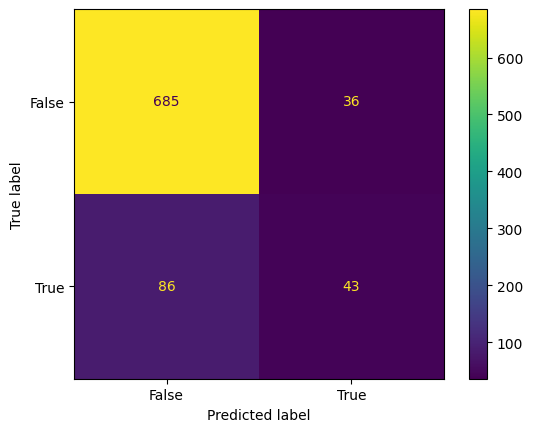

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model_log, X_test, y_test)

 Exp 02: XGBOOST, No Upsampling, No Scale

In [55]:
# SMOTE & Scale
X = dataset_hash_dummy_drop_corr.drop(["churn_yes"],axis=1)
y = dataset_hash_dummy_drop_corr['churn_yes']

# Create file train ,test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

In [57]:
# XGBoost
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, n_estimators = 200)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)

In [58]:
print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98       721
        True       0.92      0.81      0.86       129

    accuracy                           0.96       850
   macro avg       0.94      0.90      0.92       850
weighted avg       0.96      0.96      0.96       850



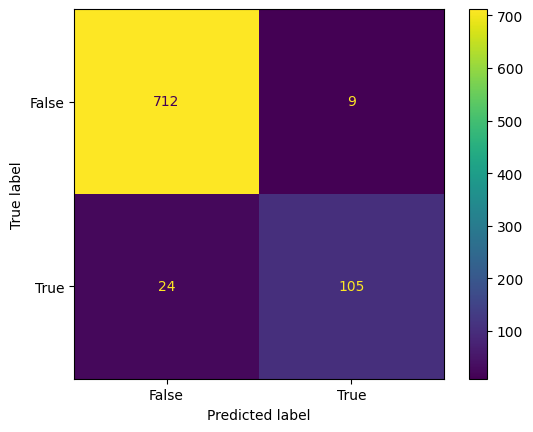

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model_xgb, X_test, y_test)

# Test

In [76]:
data_test = pd.read_csv('/content/drive/MyDrive/Dataset/Customer_Churn_Prediction/test.csv')
id_submit = data_test['id']

In [77]:
data_test.drop(columns=['id'], inplace = True)

In [78]:
data_test_hash_state = he.fit_transform(data_test)
data_test_hash_state.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0,1,0,0,0,0,0,0,128,area_code_415,...,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,0,1,0,0,0,0,0,0,118,area_code_510,...,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,0,0,0,0,0,0,0,1,62,area_code_415,...,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,0,0,0,0,1,0,0,0,93,area_code_510,...,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,1,0,0,0,0,0,0,0,174,area_code_415,...,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [79]:
data_test_dummy =  pd.get_dummies(data_test_hash_state,drop_first=True)
data_test_dummy_drop_corr = data_test_dummy.drop(columns=["voice_mail_plan_yes","total_day_charge","total_eve_charge","total_night_charge","total_intl_charge"])


In [80]:
data_test_dummy_drop_corr.columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls',
       'area_code_area_code_415', 'area_code_area_code_510',
       'international_plan_yes'],
      dtype='object')

In [81]:
y_pred_submit = model_xgb.predict(data_test_dummy_drop_corr)

In [82]:
y_pred_submit

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [83]:
submit_result = pd.DataFrame({'id': id_submit,'churn': y_pred_submit})
submit_result

,id,churn
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0
...,...,...
745,746,0
746,747,0
747,748,0
748,749,0


In [84]:
submit_result.churn.replace([0,1],['no','yes'],inplace=True)
submit_result

,id,churn
0,1,no
1,2,no
2,3,yes
3,4,no
4,5,no
...,...,...
745,746,no
746,747,no
747,748,no
748,749,no


In [85]:
submit_result.to_csv("submit.csv", index=False)

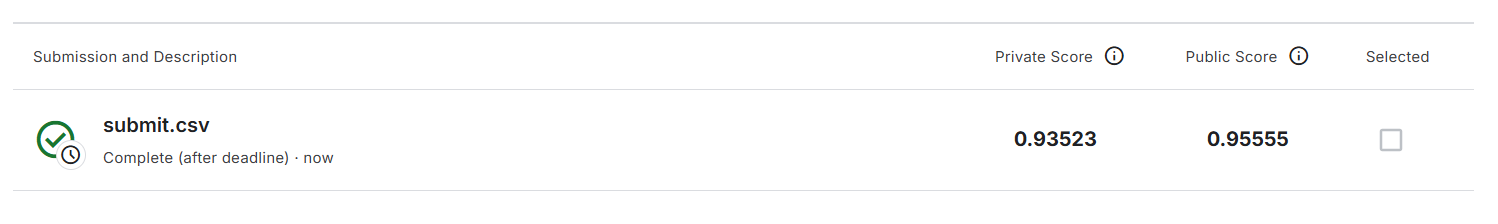